In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Импорт csv

In [2]:
df_file = pd.read_csv("federalconstructionwagerate-eng.csv", encoding='cp1252')
df_file.head(5)

,Fair Wage Schedule for Federal Construction Contracts,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,Province,Area Zone,Classes,Occupation,Wage Rate per Hour
2,Alberta,Calgary Zone,NaN,*Electricians,$30.86
3,Alberta,Calgary Zone,NaN,*Plumbers,$31.98
4,Alberta,Calgary Zone,NaN,Sprinkler System Installers,$34.92


### Переименовываем

In [3]:
df_file_updated = df_file.rename(columns={'Fair Wage Schedule for Federal Construction Contracts': 'province',
                                          'Unnamed: 1': 'area_zone',
                                          'Unnamed: 2': 'classes',
                                          'Unnamed: 3': 'occupation',
                                          'Unnamed: 4': 'wage_rate_per_hour'})
df_file_updated.drop([0,1], inplace=True)
df_file_updated.reset_index().drop(columns=['index'])

,province,area_zone,classes,occupation,wage_rate_per_hour
0,Alberta,Calgary Zone,NaN,*Electricians,$30.86
1,Alberta,Calgary Zone,NaN,*Plumbers,$31.98
2,Alberta,Calgary Zone,NaN,Sprinkler System Installers,$34.92
3,Alberta,Calgary Zone,NaN,"*Pipefitters, Steamfitters",$27.82
4,Alberta,Calgary Zone,NaN,*Sheet Metal Workers,$31.04
...,...,...,...,...,...
1023,Yukon,NaN,Category D Class,Mortar Persons,$22.09
1024,Yukon,NaN,Category D Class,Pump Tenders,$22.09
1025,Yukon,NaN,Category D Class,"Roller Operators (roller, packer or compactor)",$22.09
1026,Yukon,NaN,Category D Class,Roofer's Helpers,$22.09


### Подготовка данных

In [4]:
# Убираем '*'
for i in range(0, len(df_file_updated.occupation)):
    if '*' in df_file_updated.occupation.iloc[i]:
        df_file_updated.occupation.iloc[i] = df_file_updated.occupation.iloc[i].rsplit('*')[1]
    else:
        continue

# Убираем '$'
for i in range(0, len(df_file_updated.wage_rate_per_hour)):
    if '$' in df_file_updated.wage_rate_per_hour.iloc[i]:
        df_file_updated.wage_rate_per_hour.iloc[i] = float(df_file_updated.wage_rate_per_hour.iloc[i].rsplit('$')[1])
    else:
        continue

df_file_updated

,province,area_zone,classes,occupation,wage_rate_per_hour
2,Alberta,Calgary Zone,NaN,Electricians,30.86
3,Alberta,Calgary Zone,NaN,Plumbers,31.98
4,Alberta,Calgary Zone,NaN,Sprinkler System Installers,34.92
5,Alberta,Calgary Zone,NaN,"Pipefitters, Steamfitters",27.82
6,Alberta,Calgary Zone,NaN,Sheet Metal Workers,31.04
...,...,...,...,...,...
1025,Yukon,NaN,Category D Class,Mortar Persons,22.09
1026,Yukon,NaN,Category D Class,Pump Tenders,22.09
1027,Yukon,NaN,Category D Class,"Roller Operators (roller, packer or compactor)",22.09
1028,Yukon,NaN,Category D Class,Roofer's Helpers,22.09



Статистика по провинциям

In [5]:
agg_func_math = {
    'wage_rate_per_hour': ['mean', 'median', 'min', 'max', 'std', 'var']
}
df_func_math = df_file_updated.groupby(['province']).agg(agg_func_math).round(2)
data = df_func_math.reset_index(drop=False, inplace=False)
data

province wage_rate_per_hour                             \
                                            mean median    min    max   std   
0                    Alberta               26.37  25.99  16.03  40.98  4.69   
1            British Columbia              27.58  27.40  17.20  43.79  4.91   
2                    Manitoba              19.00  18.90   9.90  31.05  5.40   
3               New Brunswick              18.50  18.54   9.33  30.66  4.73   
4   Newfoundland and Labrador              17.13  16.49   9.27  25.64  3.37   
5       Northwest Territories              28.81  28.05  18.90  35.30  5.02   
6                 Nova Scotia              19.77  19.14   9.59  27.31  4.26   
7                     Nunavut              27.87  28.80  20.50  32.40  4.20   
8                    Ontario               29.02  30.22  13.73  43.53  5.94   
9        Prince Edward Island              14.71  14.40   8.64  20.30  3.28   
10               Saskatchewan              21.31  20.34  12.37  31.44  4.50   
11                      Yukon              27.32  27.44  22.09  30.61  3.30   

           
      var  
0   22.03  
1   24.14  
2   29.19  
3   22.39  
4   11.39  
5   25.24  
6   18.11  
7   17.65  
8   35.27  
9   10.73  
10  20.22  
11  10.91

# РАЗОБРАТЬСЯ С СОРТИРОВКОЙ СЛОВАРЯ ДЛЯ ГРАФИКА

In [9]:
dict_wages = {}
for i in range(0, len(data.province)):
    dict_wages[data.province[i]] = data.wage_rate_per_hour['mean'][i]

#dict_wages

wages_sorted = dict(sorted(dict_wages.items(), key=lambda x:x[1], reverse=True))

{'Ontario ': 29.02,
 'Northwest Territories': 28.81,
 'Nunavut': 27.87,
 'British Columbia': 27.58,
 'Yukon': 27.32,
 'Alberta ': 26.37,
 'Saskatchewan': 21.31,
 'Nova Scotia': 19.77,
 'Manitoba': 19.0,
 'New Brunswick': 18.5,
 'Newfoundland and Labrador': 17.13,
 'Prince Edward Island': 14.71}

Bar plot

Text(0.5, 0.98, 'Mean Wages')

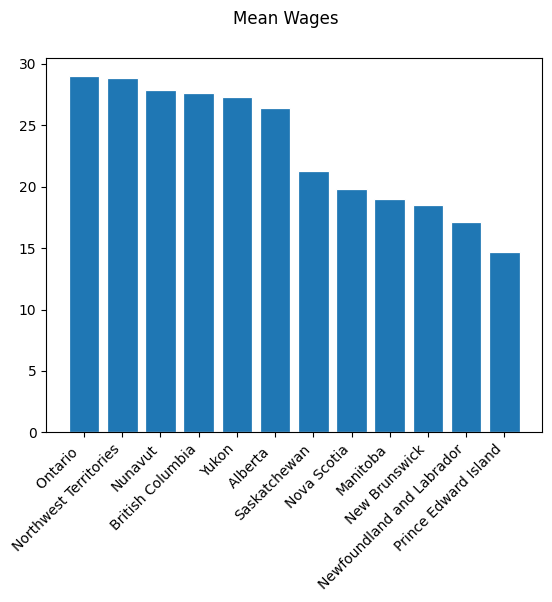

In [10]:
names = list(wages_sorted.keys())
values = list(wages_sorted.values())

fig, axs = plt.subplots()
axs.bar(names, values, width=0.8, edgecolor="white", linewidth=0.9)
fig.autofmt_xdate(bottom=0.1, rotation=45, ha='right', which='major')
fig.suptitle('Mean Wages')

Запись в файл csv

In [ ]:
# df_file_updated.to_csv('out.csv')